In [1]:
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [22]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [23]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

print(y.isnull().sum())

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

5
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
1959-01-01    315.500000
1959-02-01    316.700000
1959-03-01    316.733333
1959-04-01    317.675000
1959-05-01    318.325000
1959-06-01    318.025000
1959-07-01    316.525000
1959-08-01    314.900000
1959-09-01    313.825000
1959-10-01    313.400000
1959-11-01    314.875000
1959-12-01    315.525000
1960-01-01    316.380000
1960-02-01    316.975000
1960-03-01    317.575000
1960-04-01    319.120000
1960-05-01    319.925000
1960-06-01    319.450000
1960-07-01    318.060000
1960-08-01    315.775000
                 ...    
1999-07-01    369.000000
1999-08-01    366.700000
1999-09-01    364.675000
1999-10-01    365.140000
1999-11-01    366.650000
1999-12-01    367.900000
2000-01-01    369.020000
2000-02-01    369.375000
2000-03-01    370.40000

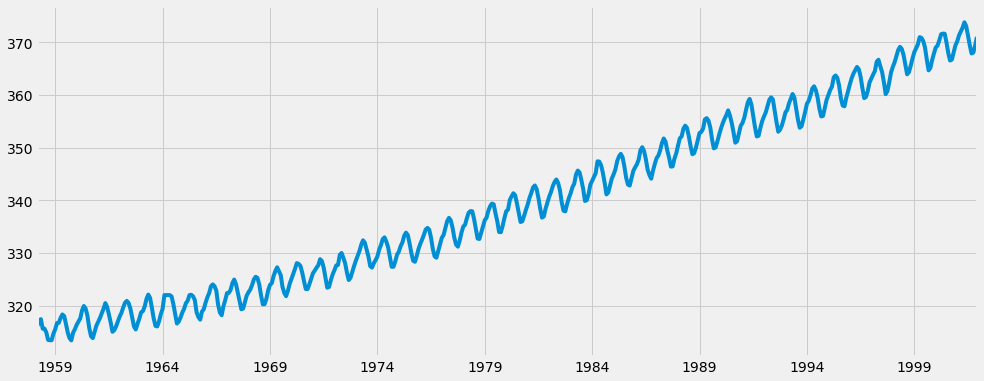

In [24]:
y.plot(figsize=(15, 6))
plt.show()

In [25]:
# ARIMA TIME
p = d = q = range(2)

# List of all possible combinations of p,d,q
pdq = list(itertools.product(p,d,q))

#Generate all different combinations of seasonal p, d, and q 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# So ARIMA can have different parameters for non-seasonal vs seasonal 
# components that combine to make better predictions


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
# warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624030462
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727641159
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.287842785377
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912937587
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.04875494035
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662328006598
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941066979707
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716809398
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1088.7022304116076
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.43094114512
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893619993
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912986582647
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194062
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055394
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283759666373
ARI

In [27]:
# (1,1,1) x (1,1,1,12) is the lowest AIC, so we go with that
# AIC is related to complexity of model and error (lower the better)

mod = sm.tsa.statespace.SARIMAX(y,
                               order=(1,1,1),
                               seasonal_order=(1,1,1,12),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()
results.summary().tables[1]


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3182,2.57e+04,1.24e-05,1.000,-5.04e+04,5.04e+04
ma.L1,-0.6254,3.68e-06,-1.7e+05,0.000,-0.625,-0.625
ar.S.L12,0.0010,3747.178,2.56e-07,1.000,-7344.332,7344.334
ma.S.L12,-0.8769,0.000,-6079.015,0.000,-0.877,-0.877
sigma2,0.0972,0.000,657.054,0.000,0.097,0.097


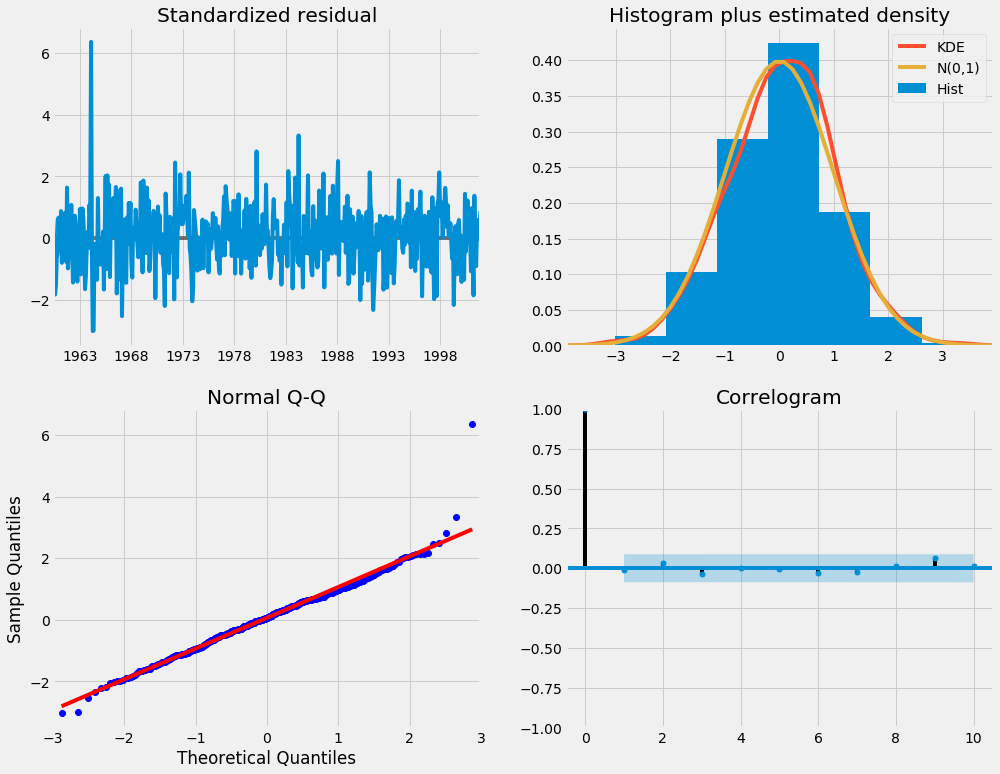

In [28]:
results.plot_diagnostics(figsize=(15, 12))
# Concern is that model is normally distributed/uncorrelated
plt.show()

In [34]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True)
pred_ci = pred.conf_int()

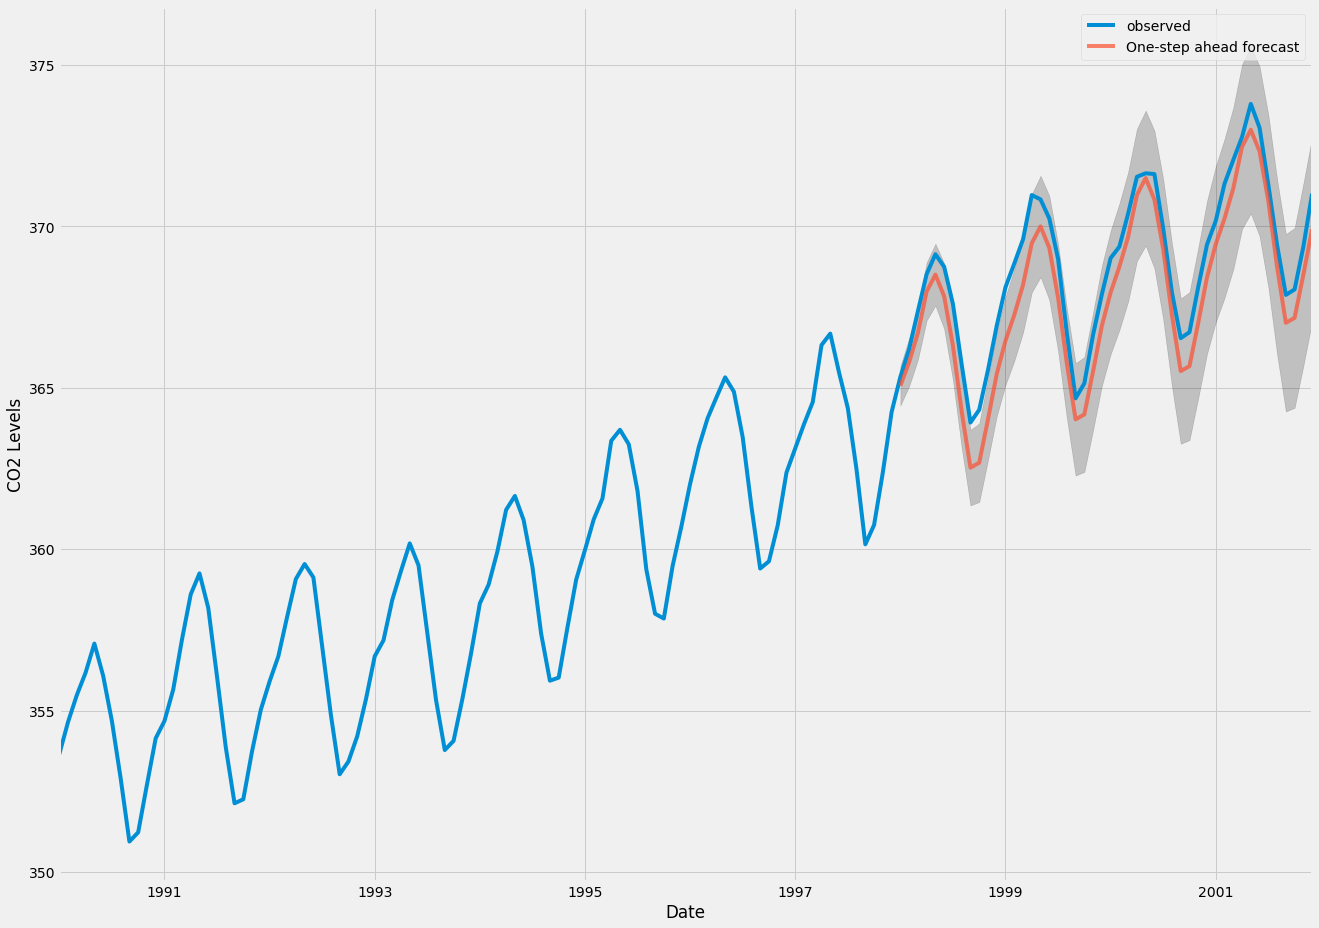

In [38]:
ax = y['1990':].plot(label='observed', figsize=(20,15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [39]:
pd.to_datetime('1998-01-01')

Timestamp('1998-01-01 00:00:00')

In [40]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [41]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


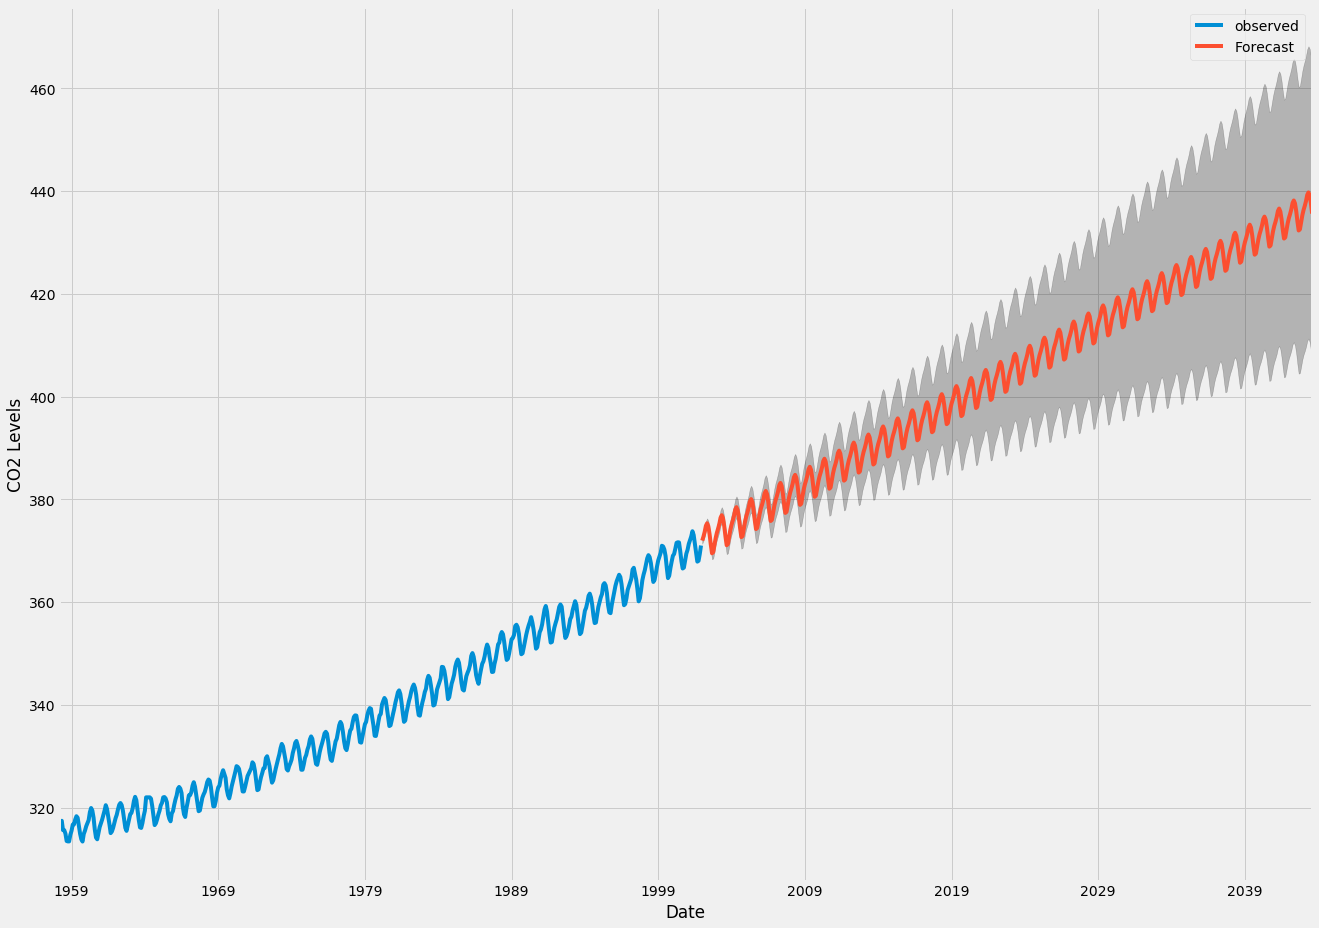

In [42]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()